In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
# import the data
prior_df = pd.read_csv("../data/true_label__inst_type=sample__task=tissue.csv.gz", compression="gzip", sep=",")
ic_df = pd.read_csv("../data/UBERON_IC.csv", sep=",")
log2auprc_df = pd.read_csv("../data/tissue_model_stats.csv", sep=",")
best_th_df_f1 = pd.read_csv("../results/f1.0_best_threshold.csv", sep = "\t")
samplelasso_label_f1 = pd.read_csv("../results/sampleLASSO_labels_prior_pos_predpos_f1.csv", sep=",")
best_th_df_f05 = pd.read_csv("../results/f0.5_best_threshold.csv", sep = "\t")
samplelasso_label_f05 = pd.read_csv("../results/sampleLASSO_labels_prior_pos_predpos_f05.csv", sep=",")


In [217]:
# f1: best threshold
best_th_df_f1 = best_th_df_f1[best_th_df_f1["task"] != "task"].reset_index(drop = True)
best_th_df_f1["best_threshold"] = pd.to_numeric(best_th_df_f1["best_threshold"], errors="coerce")
best_th_df_f1.head()

,task,best_threshold,log2(auprc/prior)
0,UBERON:0000955,0.185533,4.5188029588002125
1,UBERON:0002020,0.556865,4.920716750475535
2,UBERON:0000165,0.018264,6.51231719888939
3,CL:0000576,0.581022,4.773390000513925
4,UBERON:0035553,0.002633,5.409390936137702


In [ ]:
# f0.5: best threshold
best_th_df_f05 = best_th_df_f05[best_th_df_f05["task"] != "task"].reset_index(drop = True)
best_th_df_f05["best_threshold"] = pd.to_numeric(best_th_df_f05["best_threshold"], errors="coerce")
best_th_df_f05.head()

,task,best_threshold,log2(auprc/prior)
0,UBERON:0000955,0.185533,4.5188029588002125
1,UBERON:0002020,0.556865,4.920716750475535
2,UBERON:0000165,0.018264,6.51231719888939
3,CL:0000576,0.581022,4.773390000513925
4,UBERON:0035553,0.002633,5.409390936137702


In [218]:
best_th_df_f1.shape, best_th_df_f05.shape

((183, 3), (183, 3))

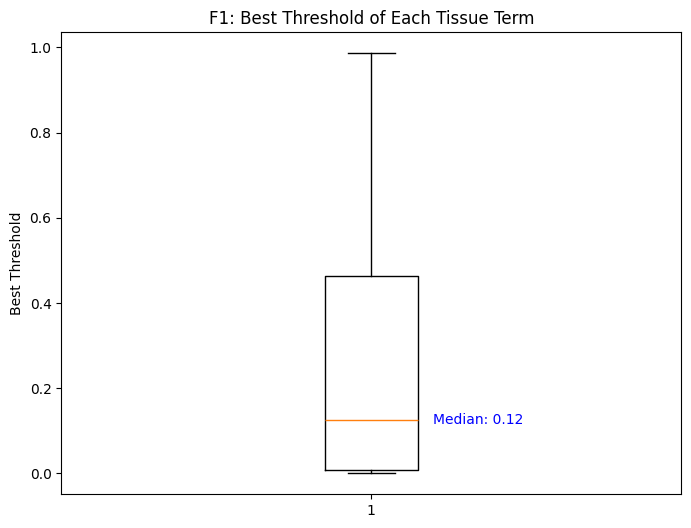

In [219]:
# boxplot for the best threshold
plt.figure(figsize=(8, 6))
box = plt.boxplot(best_th_df_f1["best_threshold"])
median_value = best_th_df_f1["best_threshold"].median()
plt.text(1.1, median_value, f"Median: {median_value:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.ylabel("Best Threshold")
plt.title("F1: Best Threshold of Each Tissue Term")
# Show the plot
plt.show()


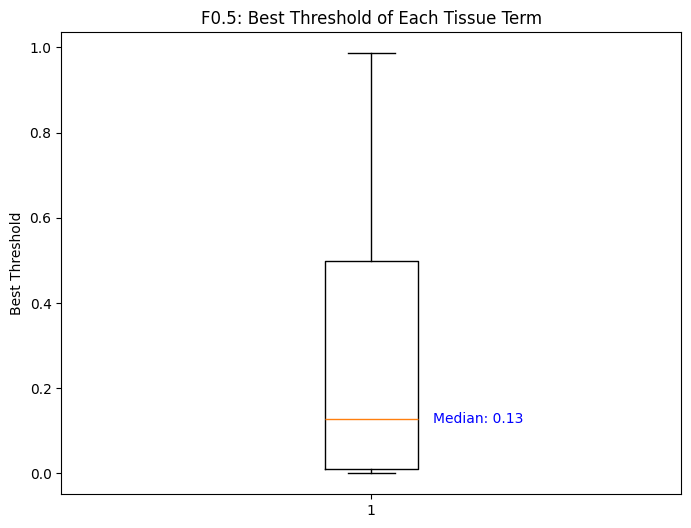

In [220]:
# boxplot for the best threshold
plt.figure(figsize=(8, 6))
box = plt.boxplot(best_th_df_f05["best_threshold"])
median_value = best_th_df_f05["best_threshold"].median()
plt.text(1.1, median_value, f"Median: {median_value:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.ylabel("Best Threshold")
plt.title("F0.5: Best Threshold of Each Tissue Term")
# Show the plot
plt.show()

In [221]:
# the top terms having the highest threshold
th_top_10_f1 = best_th_df_f1.sort_values(by="best_threshold", ascending = False).head(10)
th_top_10_f1

,task,best_threshold,log2(auprc/prior)
45,UBERON:0005401,0.986258,6.1927859592511245
181,UBERON:0011300,0.985307,6.1927859592511245
29,UBERON:0003528,0.985305,6.1927859592511245
52,UBERON:0019264,0.985305,6.1927859592511245
155,UBERON:0011143,0.984129,5.503384074119383
116,UBERON:0000956,0.970327,6.1927859592511245
167,UBERON:0001871,0.965568,6.845490050944375
122,UBERON:0004725,0.929924,6.396604781181859
152,UBERON:0002894,0.929922,6.396604781181859
92,UBERON:0002973,0.929877,6.396604781181859


In [223]:
# the top terms having the highest threshold
th_top_10_f05 = best_th_df_f05.sort_values(by="best_threshold", ascending = False).head(10)
th_top_10_f05

,task,best_threshold,log2(auprc/prior)
45,UBERON:0005401,0.986258,6.1927859592511245
181,UBERON:0011300,0.985307,6.1927859592511245
29,UBERON:0003528,0.985305,6.1927859592511245
52,UBERON:0019264,0.985305,6.1927859592511245
155,UBERON:0011143,0.984129,5.503384074119383
116,UBERON:0000956,0.970327,6.1927859592511245
167,UBERON:0001871,0.965568,6.845490050944375
122,UBERON:0004725,0.929924,6.396604781181859
152,UBERON:0002894,0.929922,6.396604781181859
92,UBERON:0002973,0.929877,6.396604781181859


### txt2onto models label

In [224]:
# combine the best threshold, prior, ic, pos, logarprc
prior = []
ic = []
pos = []
auprcprior = []
for i in best_th_df_f1["task"]:
    prior_df_sub = prior_df[["Unnamed: 0", i]]
    prior_df_sub = prior_df_sub[(prior_df_sub != 0).all(axis=1)]
    prior_df_sub[i] = prior_df_sub[i].replace(-1, 0)
    prior.append(prior_df_sub[i].mean())
    ic_value = ic_df.loc[ic_df['node'] == i, 'IC'].values[0]
    ic.append(ic_value)
    pos_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'num_of_pos'].values[0]
    pos.append(pos_value)
    auprc_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'log2(auprc/prior)'].values[0]
    auprcprior.append(auprc_value)

# data used to train txt2onto
txt2onto_label_f1 = pd.DataFrame({"task": best_th_df_f1["task"], "best_threshold": best_th_df_f1["best_threshold"], "prior": prior, "ic": ic, "num_of_pos": pos, "log2(auprc/prior)": auprcprior})
txt2onto_label_f1

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior)
0,UBERON:0000955,0.185533,0.085881,2.067788,2394,3.632799
1,UBERON:0002020,0.556865,0.016515,2.488143,387,3.393686
2,UBERON:0000165,0.018264,0.008627,2.936865,286,3.000259
3,CL:0000576,0.581022,0.011456,7.268793,304,5.531797
4,UBERON:0035553,0.002633,0.002273,6.029103,67,9.163092
...,...,...,...,...,...,...
178,UBERON:0000170,0.252142,0.066649,4.536790,1822,3.869757
179,UBERON:0013754,0.000191,0.000827,5.134089,9,8.415853
180,UBERON:0004807,0.429789,0.005022,5.041716,168,5.159565
181,UBERON:0011300,0.985307,0.017519,3.333409,405,5.328570


In [225]:
# combine the best threshold, prior, ic, pos, logarprc
prior = []
ic = []
pos = []
auprcprior = []
for i in best_th_df_f05["task"]:
    prior_df_sub = prior_df[["Unnamed: 0", i]]
    prior_df_sub = prior_df_sub[(prior_df_sub != 0).all(axis=1)]
    prior_df_sub[i] = prior_df_sub[i].replace(-1, 0)
    prior.append(prior_df_sub[i].mean())
    ic_value = ic_df.loc[ic_df['node'] == i, 'IC'].values[0]
    ic.append(ic_value)
    pos_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'num_of_pos'].values[0]
    pos.append(pos_value)
    auprc_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'log2(auprc/prior)'].values[0]
    auprcprior.append(auprc_value)

# data used to train txt2onto
txt2onto_label_f05 = pd.DataFrame({"task": best_th_df_f05["task"], "best_threshold": best_th_df_f05["best_threshold"], "prior": prior, "ic": ic, "num_of_pos": pos, "log2(auprc/prior)": auprcprior})
txt2onto_label_f05

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior)
0,UBERON:0000955,0.185533,0.085881,2.067788,2394,3.632799
1,UBERON:0002020,0.556865,0.016515,2.488143,387,3.393686
2,UBERON:0000165,0.018264,0.008627,2.936865,286,3.000259
3,CL:0000576,0.581022,0.011456,7.268793,304,5.531797
4,UBERON:0035553,0.002633,0.002273,6.029103,67,9.163092
...,...,...,...,...,...,...
178,UBERON:0000170,0.699572,0.066649,4.536790,1822,3.869757
179,UBERON:0013754,0.000191,0.000827,5.134089,9,8.415853
180,UBERON:0004807,0.429789,0.005022,5.041716,168,5.159565
181,UBERON:0011300,0.985307,0.017519,3.333409,405,5.328570


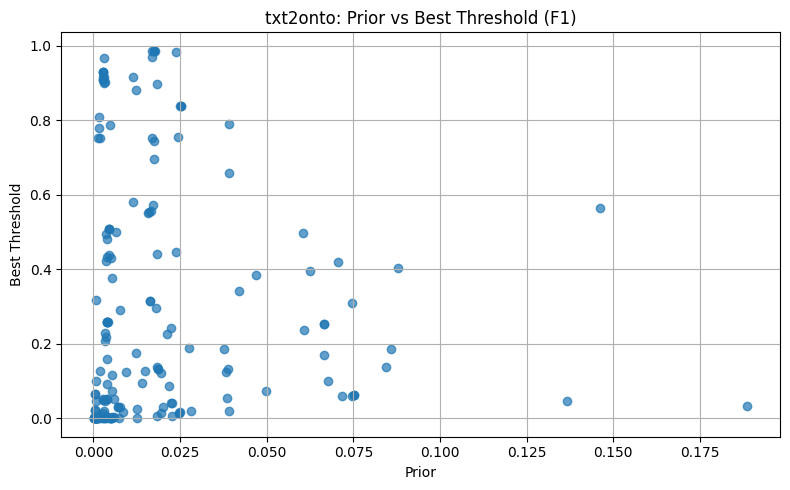

In [227]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['prior'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['prior'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['prior'], m * txt2onto_label_f1['prior'] + b, color='blue', label='Regression line')

plt.xlabel('Prior')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Prior vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [250]:
far_right_points = txt2onto_label_f1.sort_values(by = "prior", ascending = False).head()
far_right_points

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior)
110,UBERON:0000178,0.033281,0.188661,7.181782,5092,2.216790
127,CL:0000738,0.563598,0.146251,4.703844,4106,2.650433
72,CL:0000842,0.045616,0.136706,4.887565,3654,2.307990
22,UBERON:0001017,0.402891,0.087979,1.910922,1994,2.766217
0,UBERON:0000955,0.185533,0.085881,2.067788,2394,3.632799


In [251]:
top_left_points = txt2onto_label_f1.sort_values(by = "best_threshold", ascending = False).head()
top_left_points

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior)
45,UBERON:0005401,0.986258,0.017044,3.388167,390,5.334043
181,UBERON:0011300,0.985307,0.017519,3.333409,405,5.328570
29,UBERON:0003528,0.985305,0.017709,2.537391,405,5.284698
52,UBERON:0019264,0.985305,0.017519,2.962274,405,5.328570
155,UBERON:0011143,0.984129,0.023753,3.621683,634,5.047035


Note: Look into the far right three points and a few points on the top-left corner. What they are. 

The three points on the very right side of the plot are:  
    UBERON:0000178 (blood),  
    CL:0000738 (leukocyte),  
    CL:0000842 (mononuclear leukocyte).  
    They seem like still pretty high level terms.  

Some exmaples on the top-left corner of the plot are:  
    UBERON:0005401 (cerebral hemisphere gray matter),  
    UBERON:0011300 (gray matter of telencephalon),  
    UBERON:0003528 (brain gray matter),  
    UBERON:0019264 (gray matter of forebrain),  
    UBERON:0011143 (upper urinary tract).  


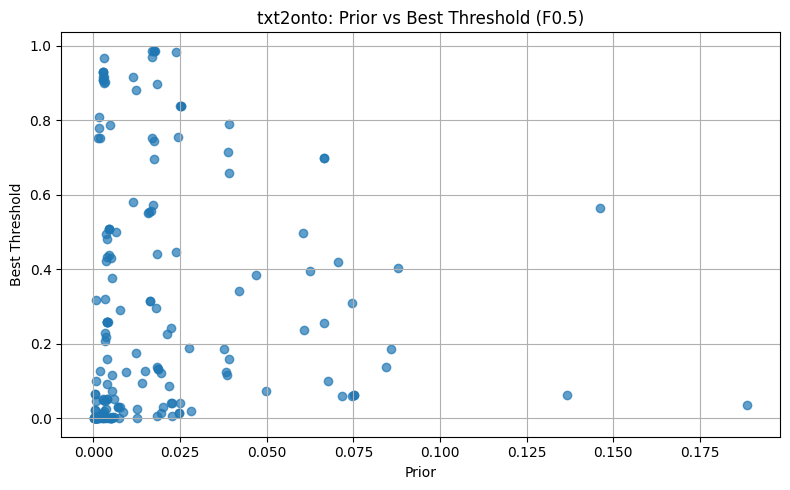

In [229]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['prior'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['prior'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['prior'], m * txt2onto_label_f05['prior'] + b, color='blue', label='Regression line')

plt.xlabel('Prior')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Prior vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

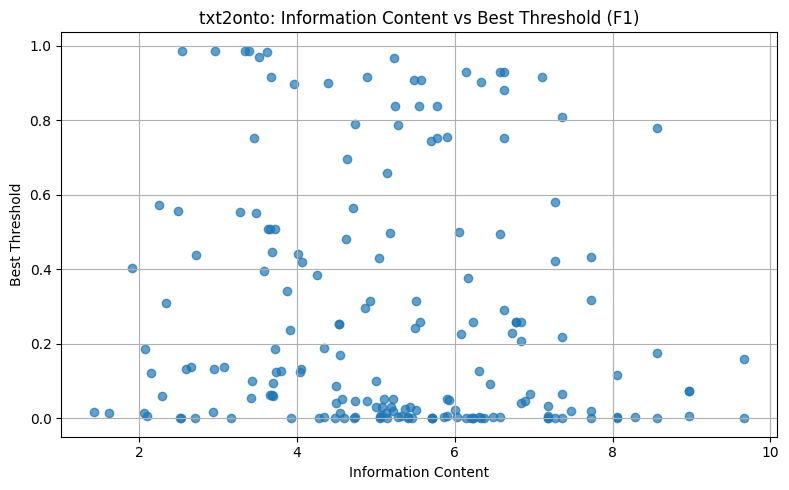

In [230]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['ic'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['ic'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['ic'], m * txt2onto_label_f1['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Information Content vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

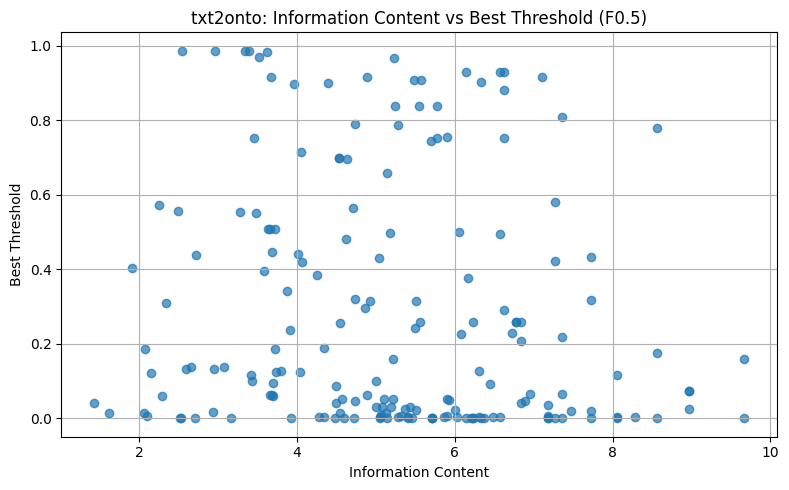

In [231]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['ic'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['ic'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['ic'], m * txt2onto_label_f05['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Information Content vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

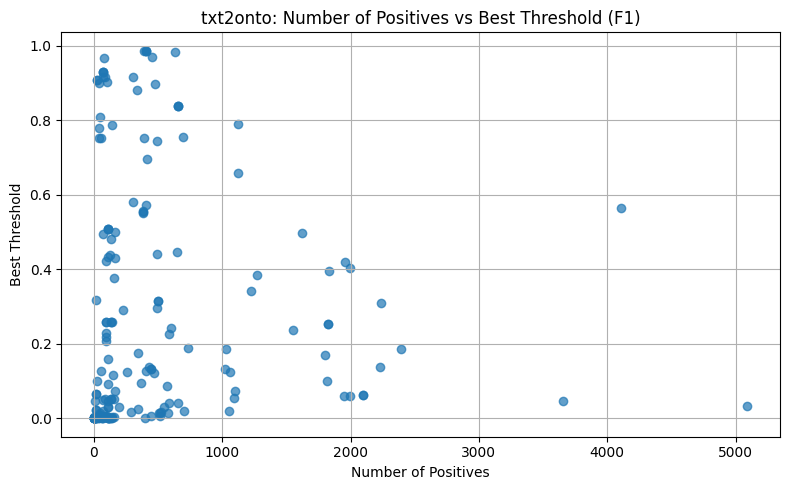

In [232]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['num_of_pos'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['num_of_pos'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['num_of_pos'], m * txt2onto_label_f1['num_of_pos'] + b, color='blue', label='Regression line')

plt.xlabel('Number of Positives')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Number of Positives vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

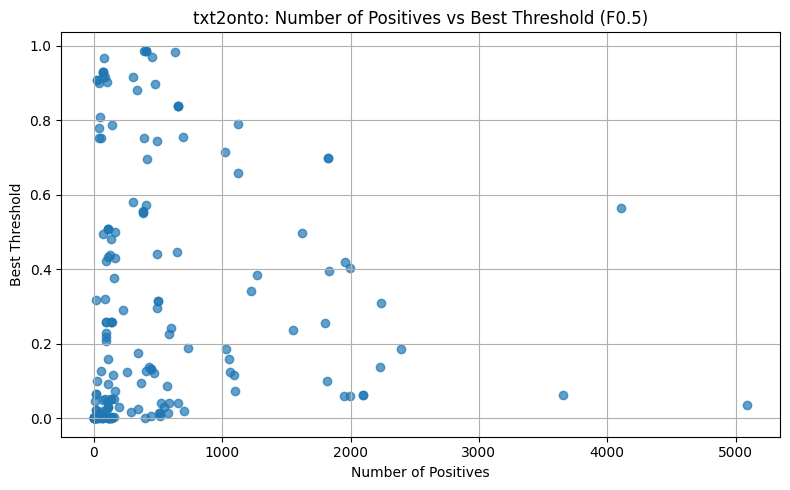

In [233]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['num_of_pos'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['num_of_pos'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['num_of_pos'], m * txt2onto_label_f05['num_of_pos'] + b, color='blue', label='Regression line')

plt.xlabel('Number of Positives')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Number of Positives vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

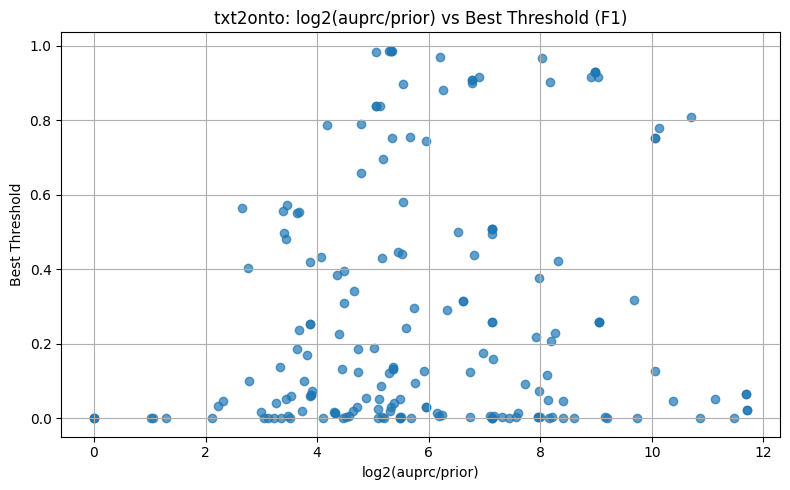

In [234]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['log2(auprc/prior)'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['log2(auprc/prior)'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['log2(auprc/prior)'], m * txt2onto_label_f1['log2(auprc/prior)'] + b, color='blue', label='Regression line')

plt.xlabel('log2(auprc/prior)')
plt.ylabel('Best Threshold')
plt.title('txt2onto: log2(auprc/prior) vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

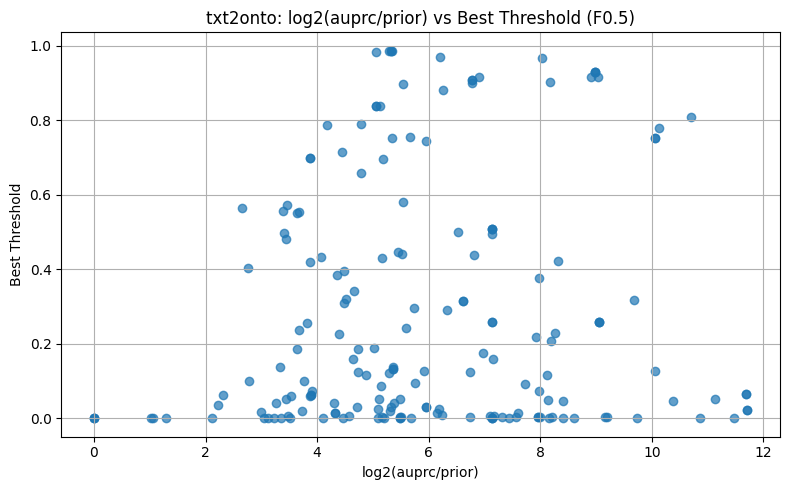

In [235]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['log2(auprc/prior)'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['log2(auprc/prior)'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['log2(auprc/prior)'], m * txt2onto_label_f05['log2(auprc/prior)'] + b, color='blue', label='Regression line')

plt.xlabel('log2(auprc/prior)')
plt.ylabel('Best Threshold')
plt.title('txt2onto: log2(auprc/prior) vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

### sampleLASSO microarray ground truth label

In [ ]:
samplelasso_label_f1.head()

,task,best_threshold,prior,num_of_pos,num_of_pred_pos
0,UBERON:0000955,0.185533,0.057641,456,398
1,UBERON:0002020,0.556865,0.013676,107,32
2,UBERON:0000165,0.018264,0.018734,143,64
3,CL:0000576,0.581022,0.016007,110,37
4,UBERON:0035553,0.002633,0.006133,48,10


In [236]:
samplelasso_label_f05.head()

,task,best_threshold,prior,num_of_pos,num_of_pred_pos
0,UBERON:0000955,0.185533,0.057641,456,398
1,UBERON:0002020,0.556865,0.013676,107,32
2,UBERON:0000165,0.018264,0.018734,143,64
3,CL:0000576,0.581022,0.016007,110,37
4,UBERON:0035553,0.002633,0.006133,48,10


In [ ]:
samplelasso_label_f1.shape, samplelasso_label_f05.shape

((183, 5), (183, 5))

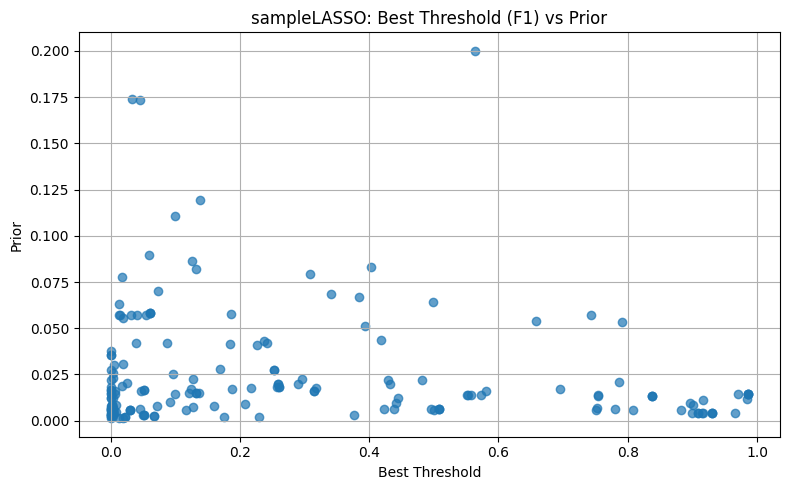

In [238]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['prior'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['prior'], 1)
#plt.plot(samplelasso_label_f1['best_threshold'], m * samplelasso_label_f1['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Prior')
plt.title('sampleLASSO: Best Threshold (F1) vs Prior')
plt.grid(True)
plt.tight_layout()
plt.show()


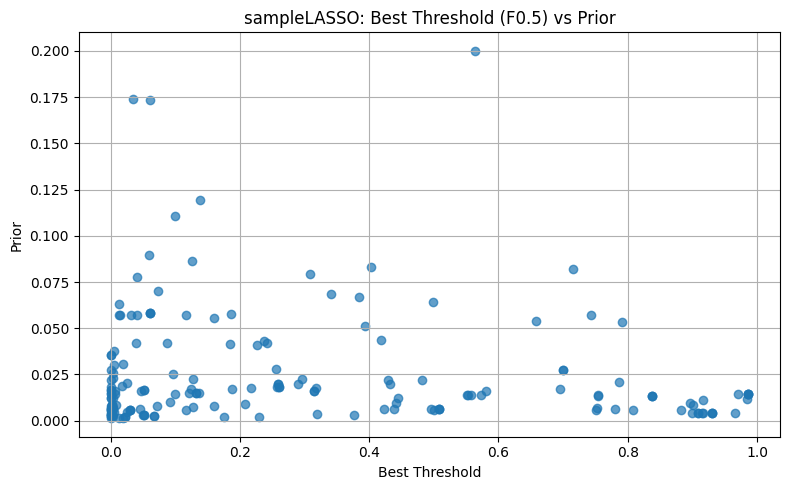

In [239]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['prior'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['prior'], 1)
#plt.plot(samplelasso_label_f05['best_threshold'], m * samplelasso_label_f05['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Prior')
plt.title('sampleLASSO: Best Threshold (F0.5) vs Prior')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
gt_prior_top_10_f1 = samplelasso_label_f1.sort_values(by="prior", ascending = False).head(10)
gt_prior_top_10_f1

,task,best_threshold,prior,num_of_pos,num_of_pred_pos
127,CL:0000738,0.563598,0.200136,1474,511
110,UBERON:0000178,0.033281,0.174128,1373,1737
72,CL:0000842,0.045616,0.173432,1269,1460
91,UBERON:0013765,0.138408,0.119524,955,608
47,UBERON:0005156,0.100354,0.110715,900,740
133,UBERON:0001555,0.059711,0.089811,721,478
23,UBERON:0003133,0.125690,0.086357,702,561
22,UBERON:0001017,0.402891,0.083139,676,408
32,UBERON:0000474,0.132473,0.081879,657,590
81,UBERON:0004921,0.309169,0.079375,630,351


In [240]:
gt_prior_top_10_f05 = samplelasso_label_f05.sort_values(by="prior", ascending = False).head(10)
gt_prior_top_10_f05

,task,best_threshold,prior,num_of_pos,num_of_pred_pos
127,CL:0000738,0.563598,0.200136,1474,511
110,UBERON:0000178,0.034743,0.174128,1373,1711
72,CL:0000842,0.061629,0.173432,1269,1264
91,UBERON:0013765,0.138408,0.119524,955,608
47,UBERON:0005156,0.100354,0.110715,900,740
133,UBERON:0001555,0.059711,0.089811,721,478
23,UBERON:0003133,0.125690,0.086357,702,561
22,UBERON:0001017,0.402891,0.083139,676,408
32,UBERON:0000474,0.715791,0.081879,657,507
81,UBERON:0004921,0.309169,0.079375,630,351


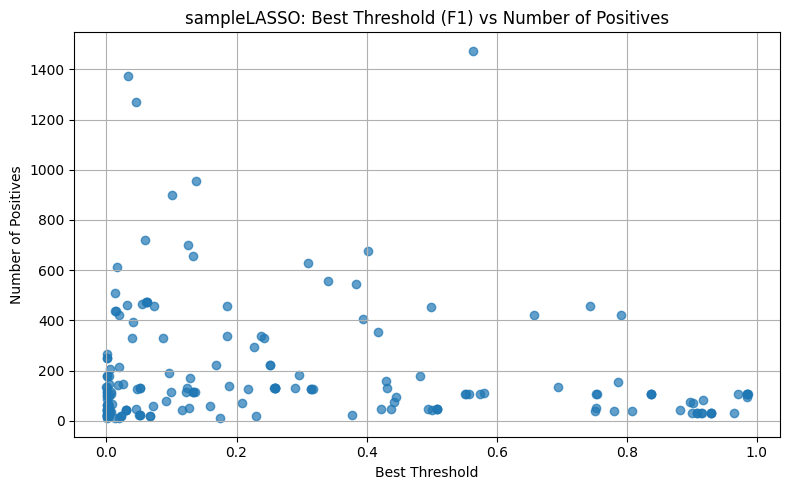

In [241]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pos'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pos'], 1)
#plt.plot(samplelasso_label_f1['best_threshold'], m * samplelasso_label_f1['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Positives')
plt.title('sampleLASSO: Best Threshold (F1) vs Number of Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

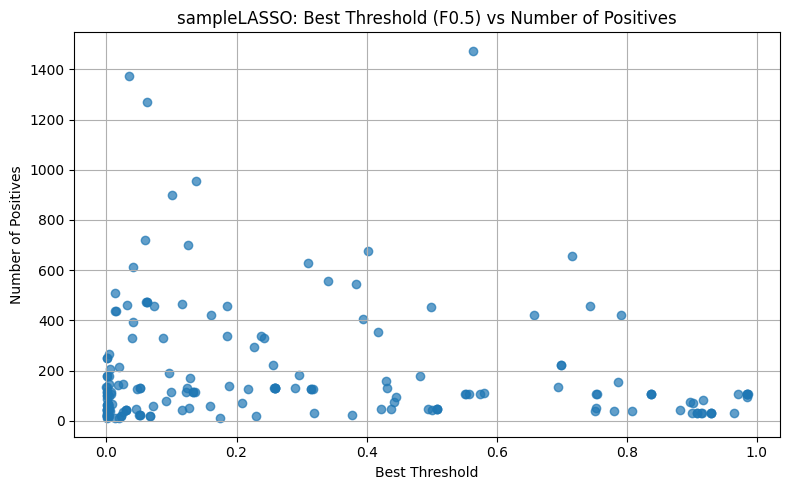

In [242]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pos'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pos'], 1)
#plt.plot(samplelasso_label_f05['best_threshold'], m * samplelasso_label_f05['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Positives')
plt.title('sampleLASSO: Best Threshold (F0.5) vs Number of Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

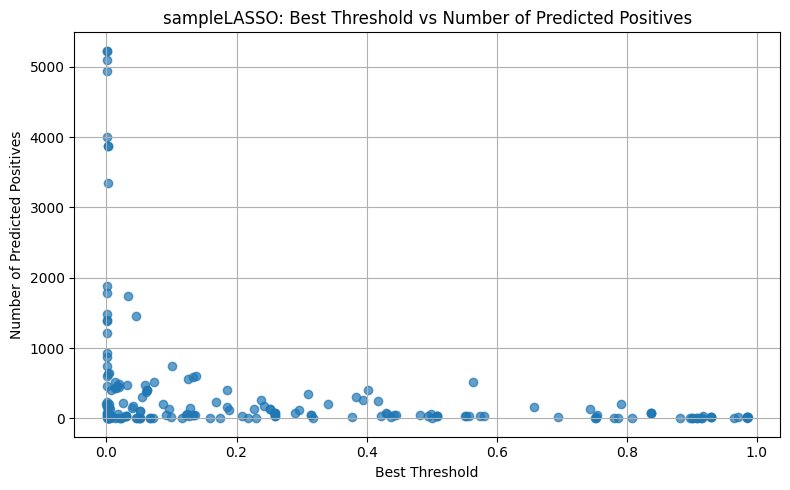

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pred_pos'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pred_pos'], 1)
#plt.plot(samplelasso_label_f1['best_threshold'], m * samplelasso_label_f1['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Predicted Positives')
plt.title('sampleLASSO: Best Threshold (F1) vs Number of Predicted Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

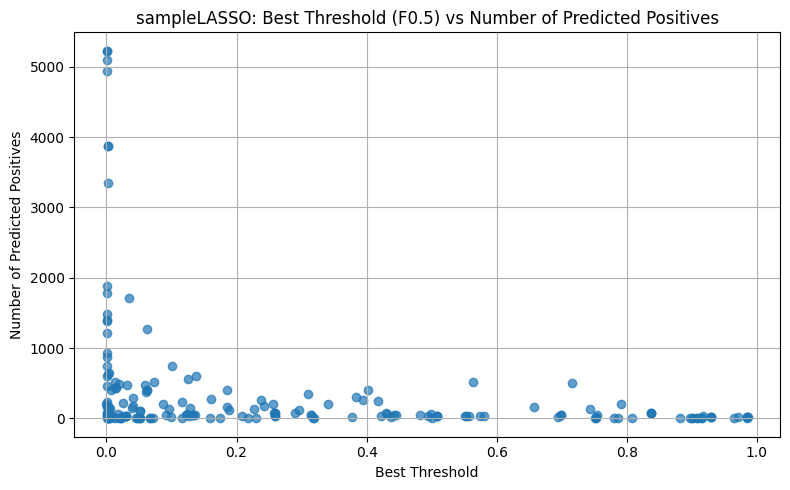

In [243]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pred_pos'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pred_pos'], 1)
#plt.plot(samplelasso_label_f05['best_threshold'], m * samplelasso_label_f05['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Predicted Positives')
plt.title('sampleLASSO: Best Threshold (F0.5) vs Number of Predicted Positives')
plt.grid(True)
plt.tight_layout()
plt.show()